<a href="https://colab.research.google.com/github/MariaMalchenko/KSVD/blob/main/Malchenko_KSVD9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

In [21]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
pdf = df.toPandas()
spark = SparkSession.builder.appName("CruiseDatasetAnalysis").getOrCreate()

In [9]:
from google.colab import files
uploaded = files.upload()

Saving cruise_dataset.csv to cruise_dataset.csv


In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, max, min, count

spark = SparkSession.builder.appName("CruiseData").getOrCreate()
df = spark.read.csv("cruise_dataset.csv", header=True, inferSchema=True)
df.show(5)

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
only showing top 5 rows



In [11]:
df.printSchema()

root
 |-- Ship_name: string (nullable = true)
 |-- Cruise_line: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tonnage: double (nullable = true)
 |-- passengers: double (nullable = true)
 |-- length: double (nullable = true)
 |-- cabins: double (nullable = true)
 |-- passenger_density: double (nullable = true)
 |-- crew: double (nullable = true)



In [12]:
df.count()

158

In [15]:
df.select(avg("Age")).show()

+------------------+
|          avg(Age)|
+------------------+
|15.689873417721518|
+------------------+



In [16]:
df.columns

['Ship_name',
 'Cruise_line',
 'Age',
 'Tonnage',
 'passengers',
 'length',
 'cabins',
 'passenger_density',
 'crew']

In [17]:
df.filter(df["Tonnage"] > 40).show()
df.filter((df["Length"] > 7) & (df["Tonnage"] < 40)).show()

+-----------+-----------+---+------------------+----------+------+------+-----------------+-----+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density| crew|
+-----------+-----------+---+------------------+----------+------+------+-----------------+-----+
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8|  6.7|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99| 19.1|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36| 10.0|
|    Ecstasy|   Carnival| 22|            70.367|     20.52|  8.55|  10.2|            34.29|  9.2|
|    Elation|   Carnival| 15|            70.367|     20.52|  8.55|  10.2|            34.29|  9.2|
|    Fantasy|   Carnival| 23|            70.367|     20.56|  8.55| 10.22|            34.23|  9.2|
|Fascination|   Carnival| 19|            70.367|     20.52|  8.55|  10.2|            34.29|  9.2|
|    Freedom|   Carn

In [19]:
df.groupBy("Cruise_line").agg(avg("passengers")).show()
df.groupBy("Cruise_line").count().show()
df.groupBy("Cruise_line").agg(max("passengers"), min("passengers")).show()

+-----------------+------------------+
|      Cruise_line|   avg(passengers)|
+-----------------+------------------+
|            Costa|19.200000000000003|
|              P&O|20.820000000000004|
|           Cunard|             21.37|
|Regent_Seven_Seas|             5.208|
|              MSC|          18.87875|
|         Carnival| 23.45818181818182|
|          Crystal|10.100000000000001|
|           Orient|              8.26|
|         Princess|21.618823529411763|
|        Silversea|3.4050000000000002|
|         Seabourn|              2.08|
| Holland_American|14.213571428571429|
|         Windstar|              2.11|
|           Disney|              17.5|
|        Norwegian|17.876923076923077|
|          Oceania|              6.84|
|          Azamara|              6.94|
|        Celebrity|17.979999999999997|
|             Star| 9.431666666666667|
|  Royal_Caribbean|28.849565217391298|
+-----------------+------------------+

+-----------------+-----+
|      Cruise_line|count|
+----------

In [20]:
df.orderBy("crew").show()
df.orderBy(df["crew"].desc()).show()

+-----------+-----------------+---+------------------+----------+------+------+-----------------+----+
|  Ship_name|      Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|
+-----------+-----------------+---+------------------+----------+------+------+-----------------+----+
|      Aries|             Star| 22|             3.341|      0.66|   2.8|  0.33|            50.62|0.59|
|     Taurus|             Star| 22|             3.341|      0.66|  2.79|  0.33|            50.62|0.59|
|  Xpedition|        Celebrity| 12|             2.329|      0.94|  2.96|  0.45|            24.78| 0.6|
|     Spirit|         Windstar| 25|              5.35|      1.58|   4.4|  0.74|            33.86|0.88|
|       Star|         Windstar| 27|              5.35|      1.67|   4.4|  0.74|            32.04|0.88|
| ExplorerII|Regent_Seven_Seas| 27|              12.5|      3.94|  4.36|  0.88|            31.73|1.46|
|     Legend|         Seabourn| 21|              10.0|      2.08|   4.4| 

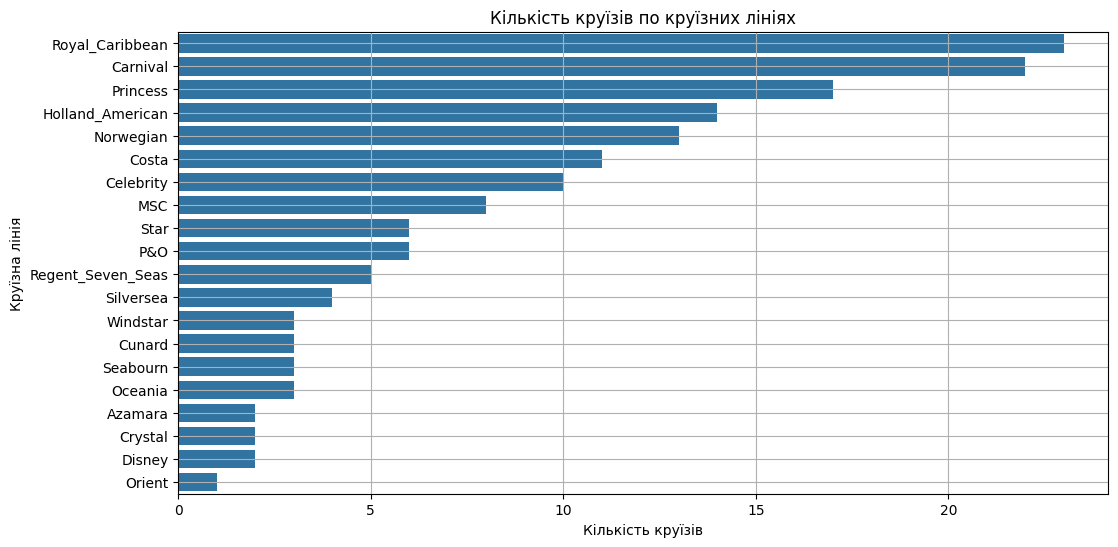

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=pdf, y="Cruise_line", order=pdf["Cruise_line"].value_counts().index)
plt.title("Кількість круїзів по круїзних лініях")
plt.xlabel("Кількість круїзів")
plt.ylabel("Круїзна лінія")
plt.grid()
plt.show()

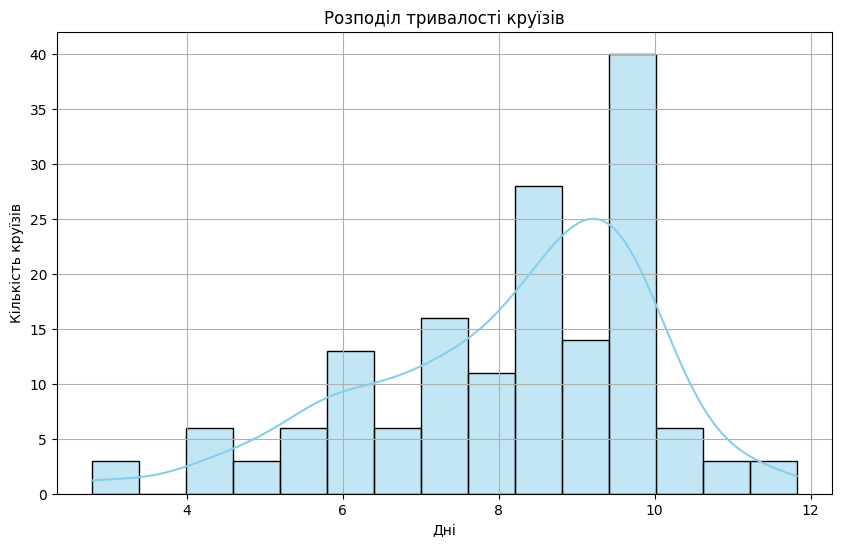

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(pdf["length"], bins=15, kde=True, color="skyblue")
plt.title("Розподіл тривалості круїзів")
plt.xlabel("Дні")
plt.ylabel("Кількість круїзів")
plt.grid()
plt.show()

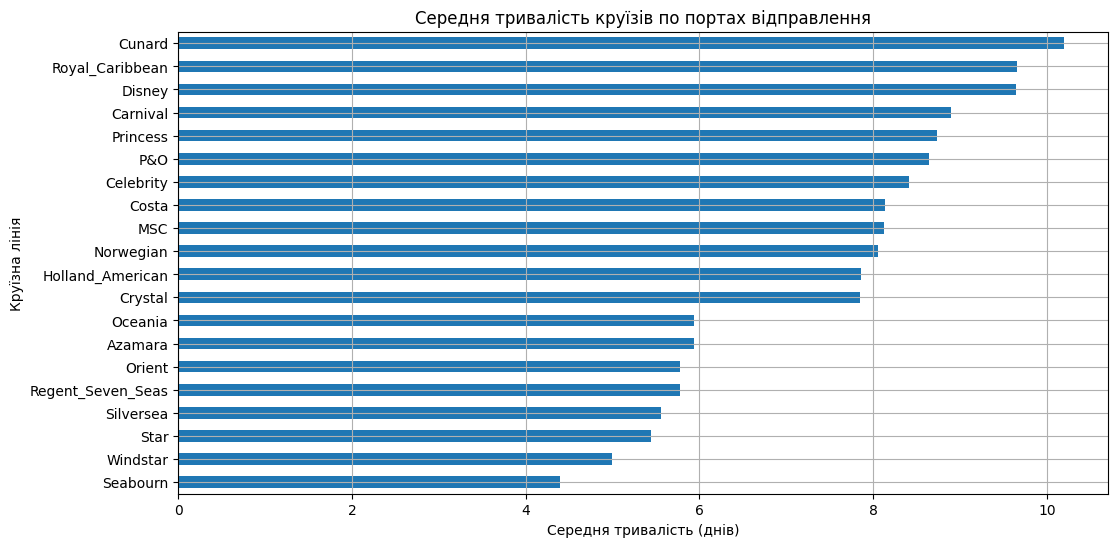

In [30]:

avg_length = pdf.groupby("Cruise_line")["length"].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_length.plot(kind="barh")
plt.title("Середня тривалість круїзів по портах відправлення")
plt.xlabel("Середня тривалість (днів)")
plt.ylabel("Круїзна лінія")
plt.grid()
plt.show()